1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

[[5.73333333 5.67861441 5.62495884 ... 1.64097486 1.68662242 1.73333333]
 [5.71339335 5.65868244 5.60503489 ... 1.62902685 1.67468243 1.72140135]
 [5.69361291 5.63891002 5.58527048 ... 1.61723839 1.66290198 1.70962892]
 ...
 [1.70962892 1.66290198 1.61723839 ... 5.58527048 5.63891002 5.69361291]
 [1.72140135 1.67468243 1.62902685 ... 5.60503489 5.65868244 5.71339335]
 [1.73333333 1.68662242 1.64097486 ... 5.62495884 5.67861441 5.73333333]]


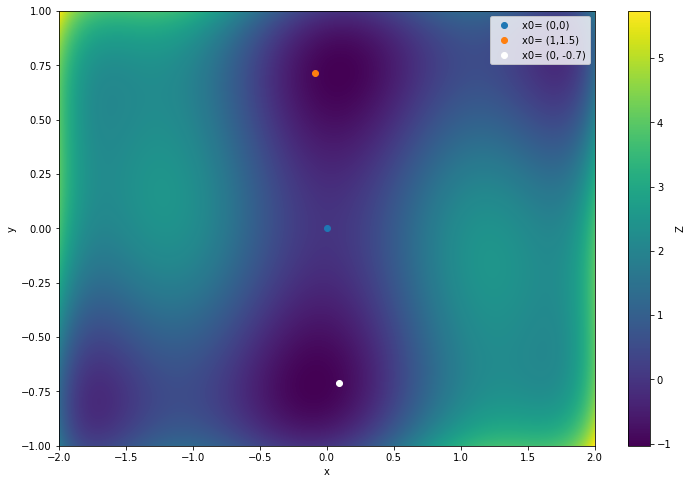

In [1]:
#notes
#numpy.meshgrid(*xi, copy=True, sparse=False, indexing='xy'
#https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
#matplotlib.pyplot.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None,
#interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
#https://www.geeksforgeeks.org/numpy-meshgrid-function/

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

x = np.linspace(-2, 2, num = 1000)
y = np.linspace(-1, 1, num = 1000)
x_1, y_1 = np.meshgrid(x, y)

XY_array = [x_1,y_1] 
def f(XY_array):
    x= XY_array[0]
    y= XY_array[1]
    return (4-2.1*x*x+(1/3)*(x**4))*(x**2)+x*y+ (4*y*y-4)*y*y

f_grid = f(XY_array)
print(f_grid)

#Plotting
plt.figure(figsize = (12,8))
plt.imshow(f_grid, extent=[-2, 2, -1, 1], aspect='auto')
plt.colorbar(label ='Z')
plt.xlabel('x')
plt.ylabel('y')

#x0 is the inital guess
x_min = minimize(f, x0=[(0, 0)], bounds = [(-2,2),(-1,1)])
plt.scatter(x_min.x[0], x_min.x[1], label='x0= (0,0)')


x_min = minimize(f, x0=[(1, 1.5)], bounds = [(-2,2),(-1,1)])
plt.scatter(x_min.x[0], x_min.x[1], label='x0= (1,1.5)')
x_min = minimize(f, x0=[(0, -0.7)], bounds = [(-2,2),(-1,1)])
plt.scatter(x_min.x[0], x_min.x[1], label='x0= (0, -0.7)' ,c='white')
plt.legend()

plt.show()


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

w, phi, A, C
[ -0.60132051  -5.13556142 -25.14962063 -36.71257793]
[ -0.59227423   7.12331894 -10.58169955  27.94963524]


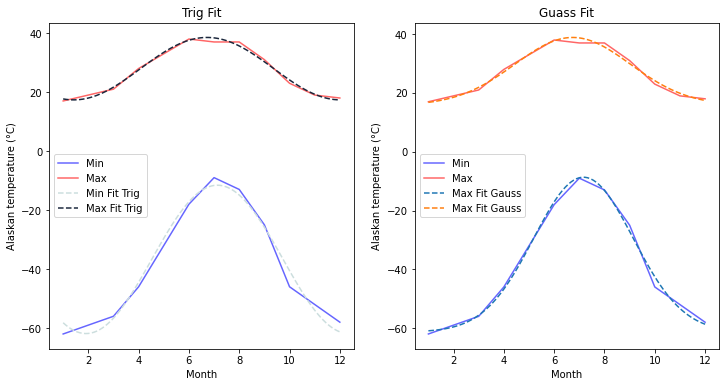

In [41]:
from scipy.stats import norm
from scipy import asarray as ar,exp
from scipy.optimize import curve_fit

t_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
t_max = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
months_str = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = np.linspace(1,12,12)    

def gauss_fit(x, mean, std, A, C): 
    #return A*norm.pdf(x, mean, std) + C
    return A*np.exp(-( ((x - mean)**2) / (2*(std**2)) ) ) + C

def trig_fit(x, w, phi, A, C):
    return A*np.cos((w*x + phi)) + C

opt_params_tmin_g, cov_tmin_g = curve_fit(gauss_fit, x, t_min)
opt_params_tmax_g, cov_tmax_g = curve_fit(gauss_fit, x, t_max)
opt_params_tmin, cov_tmin = curve_fit(trig_fit, x, t_min)
opt_params_tmax, cov_tmax = curve_fit(trig_fit, x, t_max)

print('w, phi, A, C')
print(opt_params_tmin)
print(opt_params_tmax)

x_bp = np.linspace(1,12,100)
y_bp_tmin_g = gauss_fit(x_bp, *opt_params_tmin_g)
y_bp_tmax_g = gauss_fit(x_bp, *opt_params_tmax_g)
y_bp_tmin = trig_fit(x_bp, *opt_params_tmin)
y_bp_tmax = trig_fit(x_bp, *opt_params_tmax)


fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,
                                    figsize=(12, 6))

ax0.plot(x, t_min, label = "Min", c='blue', alpha=0.6)
ax0.plot(x, t_max, label = "Max", c='red', alpha=0.6)
ax1.plot(x, t_min, label = "Min", c='blue', alpha=0.6)
ax1.plot(x, t_max, label = "Max", c='red', alpha=0.6)

ax0.plot(x_bp, y_bp_tmin, label = "Min Fit Trig", c='#CCDEDE', linestyle='dashed')
ax0.plot(x_bp, y_bp_tmax, label = "Max Fit Trig", c='#1B273C', linestyle='dashed')
ax1.plot(x_bp, y_bp_tmin_g, label = "Max Fit Gauss", linestyle='dashed')
ax1.plot(x_bp, y_bp_tmax_g, label = "Max Fit Gauss", linestyle='dashed')

ax0.set_xlabel('Month')
ax0.set_ylabel('Alaskan temperature (°C)')
ax0.legend()
ax0.set_title('Trig Fit')

ax1.set_xlabel('Month')
ax1.set_ylabel('Alaskan temperature (°C)')
ax1.legend()
ax1.set_title('Guass Fit')

ax1.legend()
plt.show()

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

[-8.54467835e-02  2.35337425e-01  3.92636518e+03  1.19186806e+02]


Power_divergenceResult(statistic=450.5456826636221, pvalue=2.727965740597047e-87)

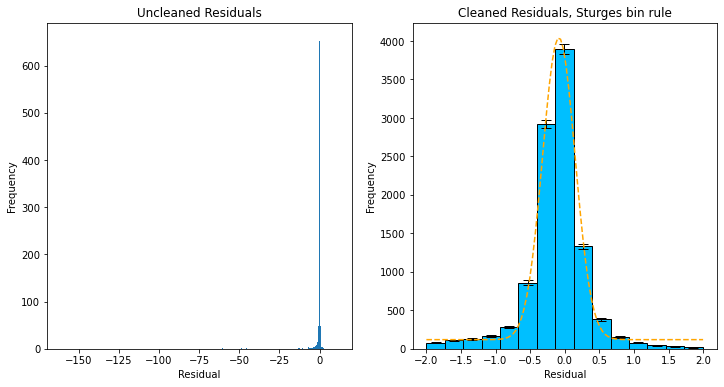

In [58]:
import pandas as pd
import math
from scipy.stats import chisquare

d=np.load('data/residuals_261.pkl', allow_pickle=True).item()
df = pd.DataFrame(data=d)

clean_df= df[df['residuals'].abs()<2]# clean as selected residuals less than 2
res = clean_df['residuals']

#Sturges' Rule for optimal number of bins
N=len(res)
n_bins = round(math.log(2*N,2)+1)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2,
                                    figsize=(12, 6))

y_bad,bin_edges_bad, bar_container_bad = ax0.hist(df['residuals'], bins = 'auto')

ax0.set(title='Uncleaned Residuals', xlabel = 'Residual', ylabel = 'Frequency')
ax1.set(title='Cleaned Residuals, Sturges bin rule', xlabel = 'Residual', ylabel = 'Frequency')


y,bin_edges, bar_container = ax1.hist(res, bins = n_bins, edgecolor = "black", color='#00bfff')
bincenters = 0.5*(bin_edges[1:]+bin_edges[:-1])
error = np.sqrt(y)
ax1.errorbar(bincenters, y, color ='black', yerr=error, capsize=5, ls='none', capthick=1, elinewidth=1)

#Was struggling to converge these params come from a fit with loads of bins ie 'n_bins =auto'
params = [-8.73049429e-02, 2.11172874e-01,  2.70464388e+02,  1.61749441e+01]
bound = ((-2, 2), (0, 5000))

opt_params_res, cov_res = curve_fit(gauss_fit, bincenters, y, p0 = params)

print(opt_params_res)
x_fit = np.linspace(-2,2,100)
y_fit = gauss_fit(x_fit, *opt_params_res)

ax1.plot(x_fit, y_fit, label = "Fit Gauss", linestyle='dashed',c='orange')

obs = y
exp = gauss_fit(bincenters, *opt_params_res)

chisquare(obs, f_exp=exp, ddof=0, axis=0)

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

Best-fit values of the parameters
a, b, c
[-9.98813369 12.33302301  9.38411487]
9.38409773497604
Typical daily averages: coolest =  -0.6037388871173217 highest =  19.372195568442635


<ipython-input-6-68084245c137>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08_12['f_Temp'] = f_fit(df_08_12['Date'], *opt_param_f_fit)


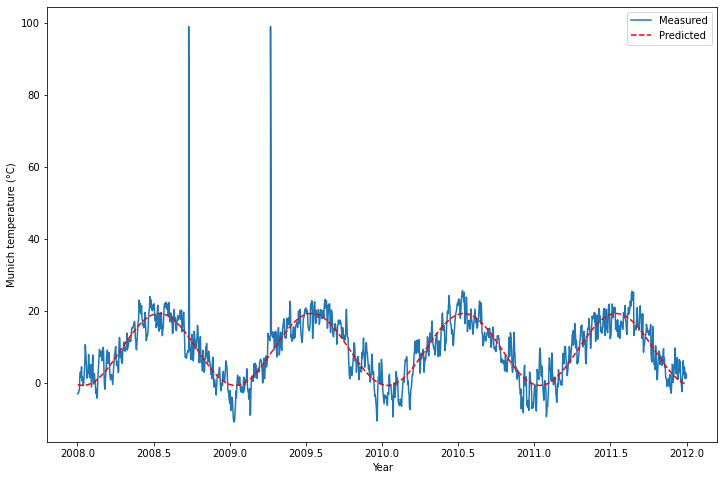

In [6]:
#if 1 year = 1, 1 day = 0.00273972602
df = pd.read_csv('munich_temperatures_average_with_bad_data.txt',sep =' ', header=None)
df.columns =['Date', 'Temp']

def f_fit(t, a, b, c):
    return a*np.cos(2*np.pi*t+b)+c

def g_fit(t, a, b, c, d):
    return a*np.cos(2*np.pi*b*t+c)+d

df_08_12= df[(df['Date']>=2008) & (df['Date']<=2012)]
opt_param_f_fit, cov_f_fit = curve_fit(f_fit, df_08_12['Date'], df_08_12['Temp'])

print('Best-fit values of the parameters')
print('a, b, c')
print(opt_param_f_fit)

avg_temp = np.mean(df_08_12['Temp'])
print(avg_temp)

df_08_12['f_Temp'] = f_fit(df_08_12['Date'], *opt_param_f_fit)
min_temp = df_08_12['f_Temp'].min()
max_temp = df_08_12['f_Temp'].max()
print('Typical daily averages: coolest = ', min_temp, 'highest = ', max_temp)  

plt.figure(figsize = (12,8))
plt.plot(df_08_12['Date'], df_08_12['Temp'], label = "Measured" )
plt.plot(df_08_12['Date'], df_08_12['f_Temp'], label = "Predicted",  c='red', linestyle='dashed')

plt.xlabel('Year')
plt.ylabel('Munich temperature (°C)')
plt.legend()
plt.show()

b parameter is a phase shift that translates the waveform in the x axis 

In [7]:
#RSS (squared sum of the residuals of the fit) 
#ndof n of parameters - 1
from scipy import stats

opt_param_g_fit, cov_g_fit = curve_fit(g_fit, df_08_12['Date'], df_08_12['Temp'])
print('Best-fit values of the parameters (g_fit)')
print('a, b, c, d')
print(opt_param_g_fit)
df_08_12['g_Temp'] = f_fit(df_08_12['Date'], *opt_param_f_fit)

dT_f = df_08_12['f_Temp'].values - df_08_12['Temp'].values
dT_g = df_08_12['g_Temp'].values - df_08_12['Temp'].values

ssr_f = np.sum(dT_f**2) 
ssr_g = np.sum(dT_g**2)

ndof_f = 3
ndof_g = 4
N = len(df_08_12['Date'])

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

f_vs_g = Ftest(ssr_f, ssr_g, ndof_f, ndof_g, N, verbose=True)

Best-fit values of the parameters (g_fit)
a, b, c, d
[-9.98218388  1.00144406 -5.90472718  9.39812492]
CL: 1.000 , additional parameter necessary: NO


<ipython-input-7-f447de1838ae>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_08_12['g_Temp'] = f_fit(df_08_12['Date'], *opt_param_f_fit)
